# <center> Introduction on Using the language R to Access Station Data

In this notebook we will look at the station active in a set time frame in a set area. By the end of this tutorial we have a station map like the one below <img src="station.png" height="250" width="250"> 

## &nbsp; Table of contents

### 1. Introduction
### 2. Set Up
### 3. Get Station data
### 4. Visualising Station data

## &nbsp; 1. Introduction

In this tutorial we will be learning how to use the language R to be able to access station data.

R is a language made for statisticians by statisticians. It is an open source language which anyone can make a package for. This means that R has a lot of useful functions for all kinds of research.

This tutorial assumes that you have basic knowledge of the language R, but basic knowledge of any programming language should be sufficient to follow this tutorial.
We will be using the packages IRISSeismic (https://CRAN.R-project.org/package=IRISSeismic) and maps (https://CRAN.R-project.org/package=maps ).<br>

This tutorial will be using GeoNet's FDSN webservices. FDSN stands for Federation of Digital Seismograph Networks. Their specifications make sure there is a consistent way for people to access seismic data. 
IRIS(Incorporated Research Institutions for Seismology) also have a FDSN webservice which IRISSeismic was written for. As such some of the functions in IRISSeismic may not work on GeoNet's data.

All data will be save into R as a data frame which is much like, what would be called, a dictionary in other languages, but with a few more restrictions to the data structure. To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame

## &nbsp; 2. Set Up

###### Install the IRISSeismic and maps packages

In [ ]:
install.packages("IRISSeismic")
install.packages("maps")

If not using binder to run this code you will need run this ONCE in R to install `IRISSeismic` and `maps`

In [2]:
#library(help = "IRISSeismic")

Note this code might take some time to run but you only need to run this ONCE. 
IRISSemismic has many functions that may be useful. To see a list of them all with description run `library(help = "IRISSeismic")`

###### Import the library and set your URLs to the same as below

In [3]:
library(IRISSeismic)
library(maps)
#Near real time
nrt <- new('IrisClient', site = 'https://service-nrt.geonet.org.nz')
#Archive
acr <- new('IrisClient', site = 'https://service.geonet.org.nz')

GeoNet has two FDSN services <br>
For waveform data
an archive service holds verified data starting 7 days after collection, 
and a near real-time service holds data that could be incomplete from the last 8 days<br>
For the event and station data there is no distinction between these services 

###### Set the start and end time of the data you want to select

In [4]:
starttime <- as.POSIXct("2010-10-01",tz="GMT")
endtime <- as.POSIXct("2011-02-23",tz="GMT")

Note that time must be in UTC (Universal Time Coordinated) which is 13 or 12 hours behind nzt (New Zealand Time) (depending on daylight savings time).
Also Note that GMT or Greenwich mean time is the same time as UTC.
    There are online converters if needed.
    You can add to the time in number of seconds eg. `stattime + 60` would be the time 2016-11-13 00:01:00.000<br>

###### Set longitude and latitude you want to look at

In [5]:
lat <- -43.5321
lon <- 172.6362

In this case we are looking at the Christchurch

## &nbsp; 3. Get Station data

Station data is an inventory of metadata from the stations 
The `getStation` function with return a R `data.frame` with columns `network` `station` `latitude` `longitude` `elevation` `sitename` `starttime` `endtime`. Where `startime` is the date of the stations installation and `endtime` is the date of that the station stopped running. Note if `endtime` is NA then the station is still running.

In [6]:
station<- getStation(acr,"NZ", "*","*", "?H?",starttime ,endtime, latitude= lat, longitude= lon ,maxradius = 1)

The parameters needed are service, network, station, location, channel, starttime, and endtime.
     The `*` is a wildcard character that says that value can be anything
    Optional parameters are `latitude` `longitude` `maxradius` and `minradius`.
    Here `latitude` and `longitude` are the latitude and longitude of the event. 

The channel code is in the fomat `"?H?"` This means we are looking for only weak motion sensor. See https://www.geonet.org.nz/data/supplementary/channels for more information.

## &nbsp; 4. Visualising Station data

In [7]:
xhigh <- max(station$longitude)+ .3
xlow <- min(station$longitude)- .3
yhigh <- max(station$latitude)+ .3
ylow <- min(station$latitude)- .3

We can take the maximum longitude shown on the map to the maximum longitude of all the station and the same for minimum and latitude. 
So that the data is not on the edge of the map we can make sure all points are at least 0.3 from the edge of the map by modifying the maximum and minimum,longitude and latitude by 0.3. 

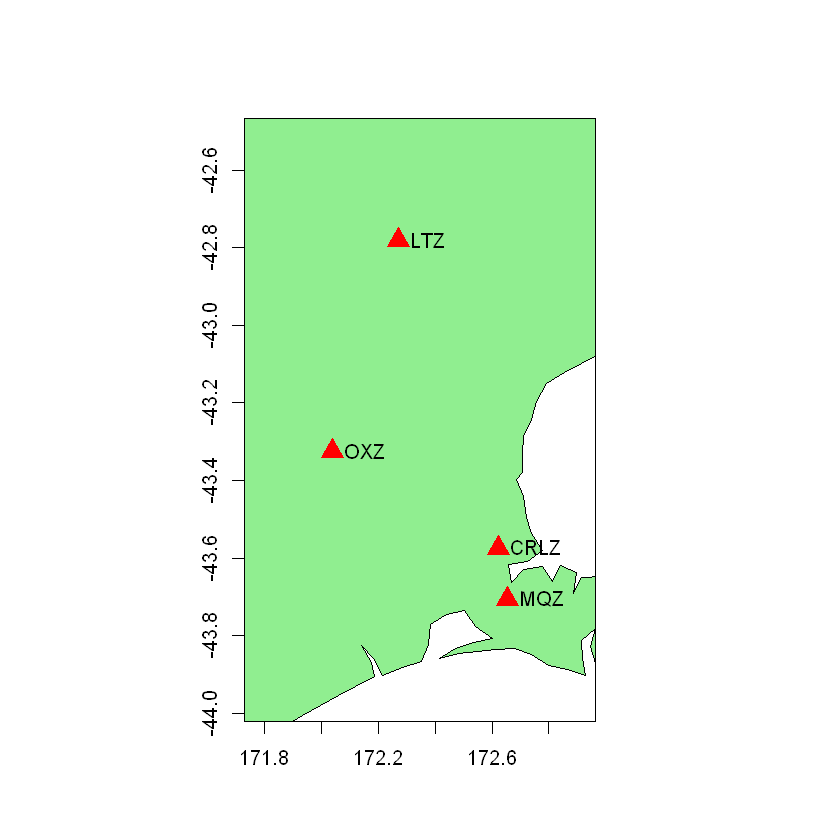

In [8]:
map("nz",xlim=c(xlow,xhigh),ylim=c(ylow,yhigh), fill=TRUE, col="lightgreen")
points(station$longitude, station$latitude, pch=17, cex=2, col='red')
labels <- paste(station$station)
text(station$longitude, station$latitude, labels=labels, cex=1, pos=4)
map.axes()

`map` makes the base map using the longitude and latitude as found above.
`pch` say what shape will be plotted` pch=17` say the shape will be triangle.
If you right click on this plot in the notebook you can save it.
For more about what you can do with maps go to http://www.geog.uoregon.edu/GeogR/ or run `library(help ="maps")`

###### Print station data

In [9]:
station

network,station,latitude,longitude,elevation,sitename,starttime,endtime
NZ,CRLZ,-43.57475,172.6232,55,Canterbury Ring Laser,1996-02-22,2014-01-09
NZ,LTZ,-42.78167,172.2710,648,Lake Taylor Station,1989-10-12,NA
NZ,MQZ,-43.70608,172.6538,57,McQueen's Valley,1989-10-13,NA
NZ,OXZ,-43.32590,172.0383,360,Oxford,2009-03-14,NA


## &nbsp;  4.3 Channel Data

Channel data is a inventory of metadata from the stations with some extra data to the station data set. 
The `getChannel` function with return a R `data.frame` with columns `network` `station` `location` `channel` `latitude` `longitude` `elevation` `depth` `azimuth` `dip` `instrument` `scale` `scalefreq` `scaleunits` `samplerate` `starttime` `endtim` and `snclId`. Where `startime` and `endtime` are the same as for the station data.

###### Get Channel data

In [10]:
channels<-getChannel(acr,"NZ", "*","*", "?H?",starttime ,endtime, latitude= lat, longitude= lon ,maxradius = 1)

The parameters needed are service, network, station, location, channel, starttime, and endtime.
     The `*` is a wildcard character that says that value can be anything.
    Optional parameters are `latitude` `longitude` `maxradius` and `minradius`.

To get the same stations as befor give `getChannel` the same parameters as `getStation`.

###### Print channel data

In [11]:
channels

,network,station,location,channel,latitude,longitude,elevation,depth,azimuth,dip,instrument,scale,scalefreq,scaleunits,samplerate,starttime,endtime,snclId
6,NZ,LTZ,10,HHE,-42.78167,172.2710,648,0.0,90,0,Broadband Seismometer,838860800,1.00,m/s,100.0,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.HHE
9,NZ,LTZ,10,HHN,-42.78167,172.2710,648,0.0,0,0,Broadband Seismometer,838860800,1.00,m/s,100.0,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.HHN
4,NZ,LTZ,10,HHZ,-42.78167,172.2710,648,0.0,0,-90,Broadband Seismometer,838860800,1.00,m/s,100.0,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.HHZ
1,NZ,LTZ,10,LHE,-42.78167,172.2710,648,0.0,90,0,Broadband Seismometer,838631826,0.10,m/s,1.0,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.LHE
8,NZ,LTZ,10,LHN,-42.78167,172.2710,648,0.0,0,0,Broadband Seismometer,838631826,0.10,m/s,1.0,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.LHN
7,NZ,LTZ,10,LHZ,-42.78167,172.2710,648,0.0,0,-90,Broadband Seismometer,838631826,0.10,m/s,1.0,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.LHZ
3,NZ,LTZ,10,VHE,-42.78167,172.2710,648,0.0,90,0,Broadband Seismometer,3335332015,0.05,m/s,0.1,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.VHE
2,NZ,LTZ,10,VHN,-42.78167,172.2710,648,0.0,0,0,Broadband Seismometer,3335332015,0.05,m/s,0.1,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.VHN
5,NZ,LTZ,10,VHZ,-42.78167,172.2710,648,0.0,0,-90,Broadband Seismometer,3335332015,0.05,m/s,0.1,2010-02-09 01:03:00,2013-10-23 05:05:00,NZ.LTZ.10.VHZ
16,NZ,MQZ,10,HHE,-43.70608,172.6538,57,0.0,90,0,Broadband Seismometer,838860800,1.00,m/s,100.0,2009-08-06 04:00:00,NA,NZ.MQZ.10.HHE


What the channel code means can be found at https://www.geonet.org.nz/data/supplementary/channels.

## Useful links. 

<ul>
<li>More on how to get seismic data can be found in the notebooks at https://github.com/GeoNet/data-tutorials/tree/master/Seismic_Data/R
<li> There is a station search at https://www.geonet.org.nz/data/network/sensor/search 
<li> To learn more about station codes go to https://www.geonet.org.nz/data/supplementary/channels
<li>IRISSeismic has a lot of functions that could be useful. Documentation of them with examples can be found at https://cran.r-project.org/web/packages/IRISSeismic/IRISSeismic.pdf
<li>To find out more about R go to https://www.r-project.org/
<li>To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame 
<li>To understand more about plots in R go to https://www.rdocumentation.org/packages/graphics/versions/3.5.1/topics/plot
<li> To understad more about maps in R go to https://cran.r-project.org/web/packages/maps/maps.pdf
<li> To learn more about what maps can be made in R go to http://www.geog.uoregon.edu/GeogR/
<li> To learn more about station codes go to https://www.geonet.org.nz/data/supplementary/channels
<li> For how to do all of this in python go to https://github.com/GeoNet/data-tutorials/tree/master/Seismic_Data/Python 